In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

# Hypothesis Testing: Labs
## Author Solutions

### 1. Elderly Women Height, Part 1
In this example we're going to see the distribution of heighs of elderly women using a histogram and a boxplot.

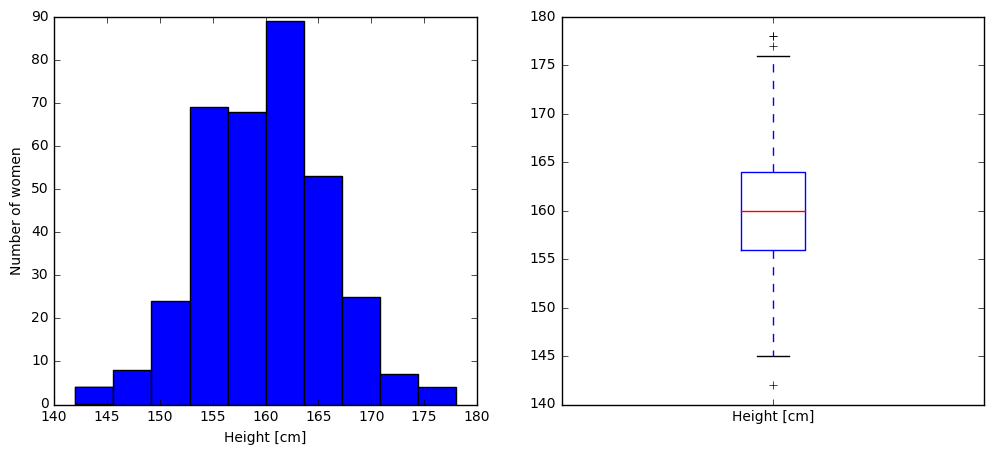

Mean: 159.77cm
Standard deviation: 6.03cm


In [2]:
heights = pd.read_table("heights.csv")
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
ax1.hist(heights.Height)
ax1.set_xlabel("Height [cm]")
ax1.set_ylabel("Number of women")
ax2.boxplot(heights.Height, labels = ["Height [cm]"])
plt.show()
print("Mean: " + str(round(heights.Height.mean(), 2)) + "cm")
print("Standard deviation: " + str(round(heights.Height.std(ddof = 1), 2)) + "cm")

### 2. Calculating Confidence Intervals
In this lab we're going to explore the so-called "confidence levels". These correspond to the area under a curve. For this example, we're going to explore the area under the standard normal distribution at different standard deviations.

In [3]:
samples = np.random.normal(size = 10000)
print("Percentage of area under the curve for various intervals (in units of sigma):")
print("[-1; 1]: " + str(round(len(samples[np.abs(samples) <= 1]) / len(samples) * 100, 2)) + "%")
print("[-1.96; 1.96]: " + str(round(len(samples[np.abs(samples) <= 1.96]) / len(samples) * 100, 2)) + "%")
print("[-2; 2]: " + str(round(len(samples[np.abs(samples) <= 2]) / len(samples) * 100, 2)) + "%")
print("[-3; 3]: " + str(round(len(samples[np.abs(samples) <= 3]) / len(samples) * 100, 2)) + "%")

Percentage of area under the curve for various intervals (in units of sigma):
[-1; 1]: 68.36%
[-1.96; 1.96]: 94.88%
[-2; 2]: 95.27%
[-3; 3]: 99.81%


### 3. Confidence Intervals and Z-Scores
As we already saw in the previous problem, we are able to convert between confidence intervals (percentage of the whole area) and z-scores. We'll write functions to do just that.

Using `scipy.stats`, we can calculate the integral (cdf) of the distribution. To get areas between intervals, we have to subtract two integrals, evaluated at both endpoints.

In [4]:
def get_confidence_interval(z_score):
    a1 = st.norm.cdf(-z_score)
    a2 = st.norm.cdf(z_score)
    return a2 - a1
    
print(get_confidence_interval(1))
print(get_confidence_interval(1.96))

0.682689492137
0.950004209704


In [5]:
def get_z_score(confidence_interval):
    total_area = (confidence_interval + 1) / 2
    return st.norm.ppf(total_area)

print(get_z_score(0.682))
print(get_z_score(0.95))

0.998576270616
1.95996398454


### 4. Elderly Women Height, Part 2
We'll calculate the 50%, 90% and 95% confidence intervals of the heights. We saw that the distribution is very close to normal so it's OK to model it with a normal distribution with mean 159.77 and standard deviation 6.03.

Let's also plot the intervals to see how they look on the real data.

50% confidence interval: [155.70793065941257, 163.841926890445]
90% confidence interval: [149.85688836116879, 169.69296918868878]
95% confidence interval: [147.95685469850773, 171.59300285134984]


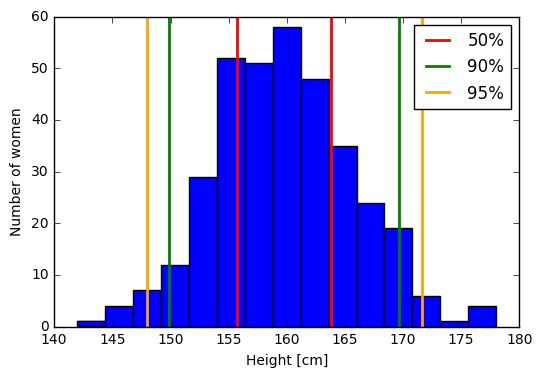

In [6]:
height_mean = heights.Height.mean()
height_std = heights.Height.std(ddof = 1)

def get_real_confidence_interval(conf_fraction, mean, std):
    lower_area = (1 - conf_fraction) / 2
    upper_area = (1 + conf_fraction) / 2
    return [
        st.norm.ppf(lower_area, mean, std),
        st.norm.ppf(upper_area, mean, std)]

intervals = [
    (50, get_real_confidence_interval(0.5, height_mean, height_std), "red"),
    (90, get_real_confidence_interval(0.9, height_mean, height_std), "green"),
    (95, get_real_confidence_interval(0.95, height_mean, height_std), "orange"),
]

for percentage, interval, color in intervals:
    print(str(percentage) + "% confidence interval: " + str(interval))
    
plt.hist(heights.Height, bins = 15)
plt.xlabel("Height [cm]")
plt.ylabel("Number of women")
for percentage, interval, color in intervals:
    plt.vlines(interval, plt.ylim()[0], plt.ylim()[1], color = color, linewidth = 2, label = str(percentage) + "%")
plt.legend()
plt.show()

### 5. Independent Two-Sample t-test
We are given data of grain size from two different farms. We want to see if they differ significantly. For this, we'll perform an independent two-sample t-test (because there is no 1:1 mapping between the two distributions). For the null hypothesis, we'll propose that the two samples are identical and any measured difference is due to chance. We'll also set the confidence level at 95% (false positive rate 5%) and check if they differ significantly.

In [7]:
grain_data = pd.read_table("grain_data.csv")
st.ttest_ind(grain_data.GreatNorthern, grain_data.BigFour)

Ttest_indResult(statistic=1.312336706487564, pvalue=0.20792200785311768)

The p-value is greater than 5% so we don't have enough evidence to reject the null hypothesis.

Let's also plot histograms of the distributions together to see what they look like.

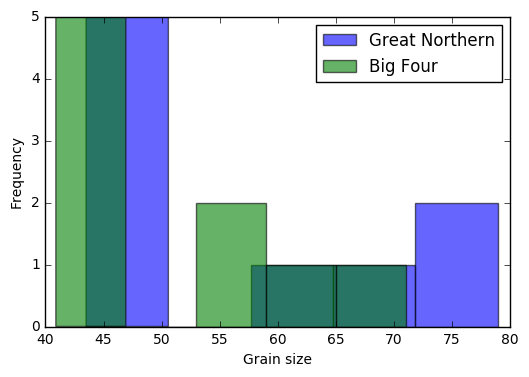

In [8]:
plt.hist(grain_data.GreatNorthern, label = "Great Northern", bins = 5, alpha = 0.6)
plt.hist(grain_data.BigFour, label = "Big Four", bins = 5, alpha = 0.6)
plt.xlabel("Grain size")
plt.ylabel("Frequency")
plt.legend()
plt.show()

From the histograms we can confirm that the two samples look more or less identical.

### 6. Paired Two-Sample t-test
If we have a 1:1 mapping between the two distributions (they don't need to be ordered), we can use a paired t-test. It provides stronger evidence (because it reduces the experimental error). We'll see an example of Zn concentrations in water. Samples have been taken from the top and bottom of the same water sources, so there's a mapping between the two distributions (they come from the same place).

We perform a one-tailed test because we want to see if the average concentration in bottom water exceeds the average concentration in top water significantly. We also set the false positive rate at 5%.

In [9]:
water_data = pd.read_table("water_data.csv")
st.ttest_rel(water_data.surface, water_data.bottom).pvalue / 2 # One-tailed test

0.00044555772891127738

In this case, the p-value is much smaller than 5% and we can reject the null hypothesis.

### 7. Fish Prices
We're given data about fish prices from 1970 and 1980 for several types of fish. We'll explore the dataset and try to answer some questions:
1. How are the prices distributed in each year? We'll create bar charts to plot each price.
2. How do prices from 1970 correlate to prices from 1980? We'll create a scatterplot to see the correlation. We may need to transform the data to see any correlations better.
3. Which fish have increased and which have decreased in prices? We'll plot the differences in a bar chart.
4. Do prices differ significantly between the years? We'll perform a t-test.

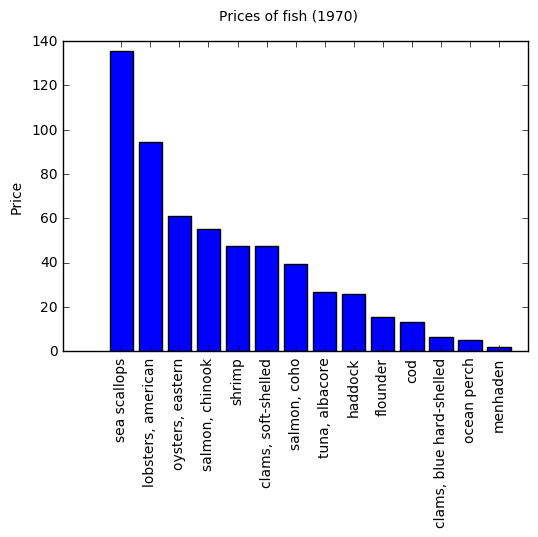

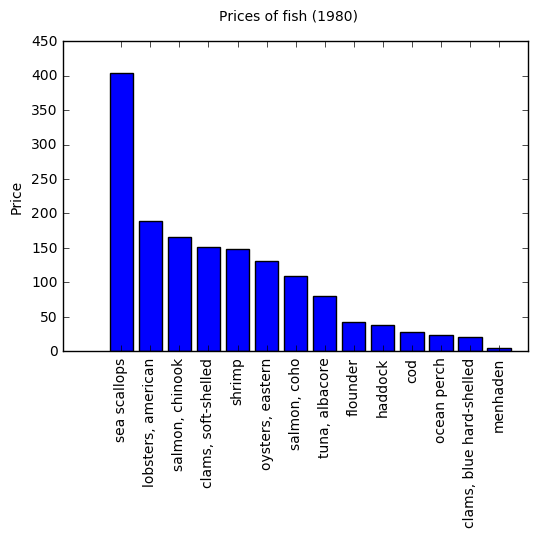

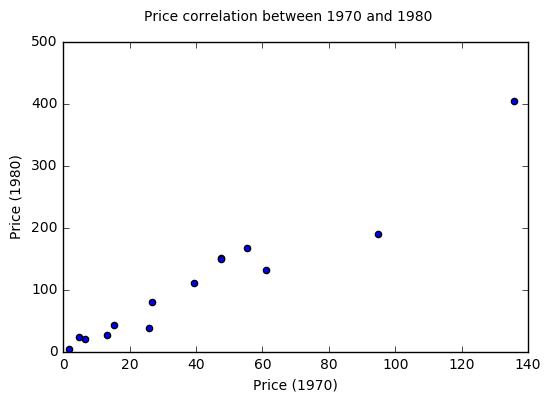

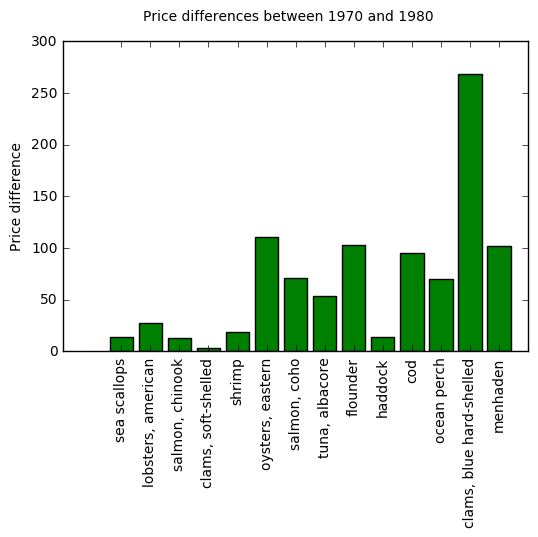

P-value: 0.00266


In [10]:
fish_prices = pd.read_table("fish_prices.csv")

# We sort the values so that we can see the price relationships better
sorted_fish = fish_prices.sort_values(by = ["Price_1970"], ascending = False)
plt.suptitle("Prices of fish (1970)")
plt.bar(np.arange(len(sorted_fish)), sorted_fish["Price_1970"], align = "center")
plt.xticks(np.arange(len(sorted_fish)), [p.lower() for p in sorted_fish["Type_Fish"]], rotation = "vertical")
plt.ylabel("Price")
plt.show()

sorted_fish = fish_prices.sort_values(by = ["Price_1980"], ascending = False)
plt.suptitle("Prices of fish (1980)")
plt.bar(np.arange(len(sorted_fish)), sorted_fish["Price_1980"], align = "center")
plt.xticks(np.arange(len(sorted_fish)), [p.lower() for p in sorted_fish["Type_Fish"]], rotation = "vertical")
plt.ylabel("Price")
plt.show()

plt.suptitle("Price correlation between 1970 and 1980")
plt.scatter(fish_prices["Price_1970"], fish_prices["Price_1980"])
plt.xlabel("Price (1970)")
plt.xlim(0, 140)
plt.ylim(0, 500)
plt.ylabel("Price (1980)")
plt.show()

plt.suptitle("Price differences between 1970 and 1980")
differences = fish_prices["Price_1980"] - fish_prices["Price_1970"]
# Plot green for incresing prices and red - for decreasing
plt.bar(np.arange(len(fish_prices)), differences, align = "center", color = (differences > 0).map({True: "g", False: "r"}))
plt.xticks(np.arange(len(fish_prices)), [p.lower() for p in sorted_fish["Type_Fish"]], rotation = "vertical")
plt.ylabel("Price difference")
plt.show()

# The same fish => paired two-sample t-test
print("P-value: " + str(round(st.ttest_rel(fish_prices["Price_1970"], fish_prices["Price_1980"]).pvalue, 5)))

From the data analysis we can conclude that:
1. The distributions of prices are almost identical, with small changes. We can also see that they're quite well correlated in the scatterplot.
2. All fish prices have risen.
3. The difference is very significant (p < 5%). So, we reject the null hypothesis that there's no significant difference in fish prices.

### 8. Calcium and Blood Pressure
We're given data of Ca intake and blood pressure for several men. 10 of them were given Ca treatment and the other 11 were given placebo.

We'll explore the data first, and then we'll perform a significance test to see whether the treatment produced statistically significant results.

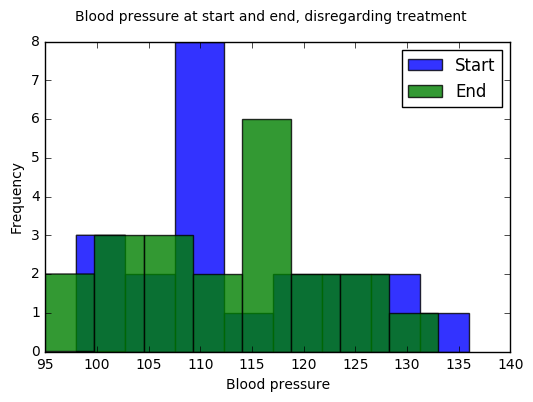

Mean decrease: 2.238095238095238


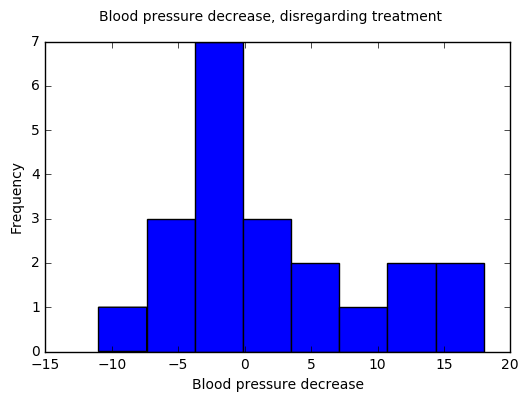

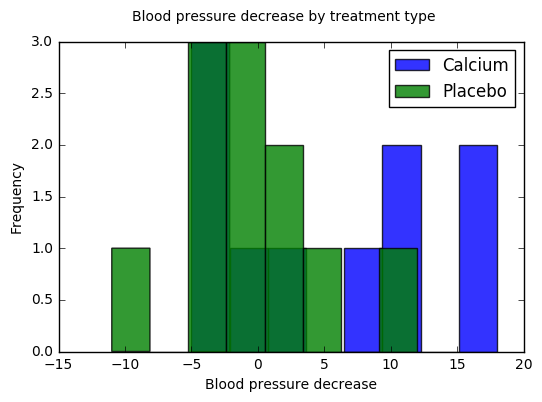

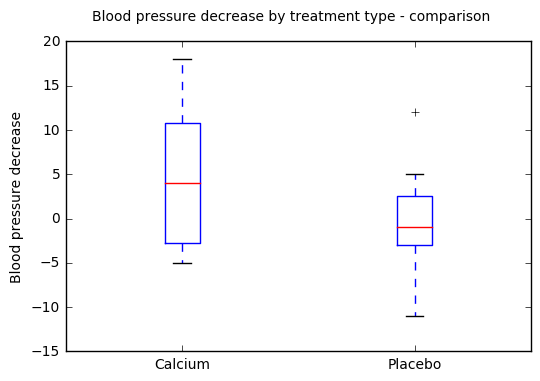

Mean decrease (Calcium): 5.0
Mean decrease (Placebo): -0.2727272727272727
P-value: 0.0593484133334


In [11]:
blood_pressure = pd.read_csv("ca_bp.csv", sep = "\t")
# Treatment 	Begin 	End 	Decrease

plt.suptitle("Blood pressure at start and end, disregarding treatment")
plt.hist(blood_pressure.Begin, bins = 8, alpha = 0.8, label = "Start")
plt.hist(blood_pressure.End, bins = 8, alpha = 0.8, label = "End")
plt.xlabel("Blood pressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Mean decrease: " + str(blood_pressure.Decrease.mean()))

plt.suptitle("Blood pressure decrease, disregarding treatment")
plt.hist(blood_pressure.Decrease, bins = 8)
plt.xlabel("Blood pressure decrease")
plt.ylabel("Frequency")
plt.show()

plt.suptitle("Blood pressure decrease by treatment type")
ca_decrease = blood_pressure[blood_pressure.Treatment == "Calcium"].Decrease
placebo_decrease = blood_pressure[blood_pressure.Treatment == "Placebo"].Decrease
plt.hist(ca_decrease, bins = 8, alpha = 0.8, label = "Calcium")
plt.hist(placebo_decrease, bins = 8, alpha = 0.8, label = "Placebo")
plt.xlabel("Blood pressure decrease")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.suptitle("Blood pressure decrease by treatment type - comparison")
plt.boxplot([ca_decrease, placebo_decrease], labels = ["Calcium", "Placebo"])
plt.ylabel("Blood pressure decrease")
plt.show()

print("Mean decrease (Calcium): " + str(ca_decrease.mean()))
print("Mean decrease (Placebo): " + str(placebo_decrease.mean()))

# Two-sample t-test, one-tailed (we want to check if the blood pressure decreased significantly)
print("P-value: " + str(st.ttest_ind(ca_decrease, placebo_decrease).pvalue / 2))

We can see from the data that treatment with Ca seems to have produced lower blood pressure values. This can also be seen when we look at the mean decrease. When we take the treatment into account, we see that in the placebo group, the blood pressure has increased slightly but in the Ca group it has decreased by 5 units. However, the significance test doesn't allow us to reject the null hypothesis at the 5% level - we don't have enough evidence.

### 9. Singer Heights
We're given data of singer heights in the NY Choral Society in 1979, in inches, rounded to the nearest inch. Voice parts in order from highest pitch to lowest pitch are Soprano, Alto, Tenor, Bass. The first two are female voices and the last two are male voices.

We'll explore the data by inspecting the distributions and creating boxplots.

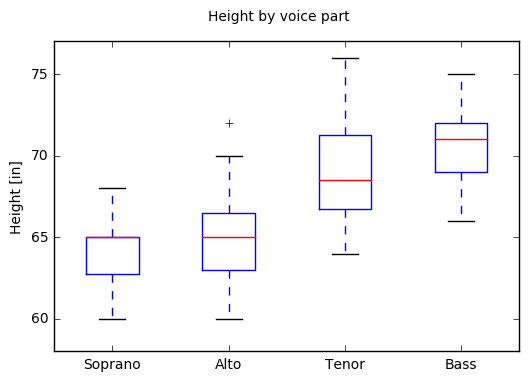

In [12]:
singer_heights = pd.read_table("singer_heights.csv")
ranges = [singer_heights.Soprano.dropna(), singer_heights.Alto.dropna(), singer_heights.Tenor.dropna(), singer_heights.Bass.dropna()]
plt.suptitle("Height by voice part")
plt.boxplot(ranges, labels = ["Soprano", "Alto", "Tenor", "Bass"])
plt.ylabel("Height [in]")
plt.ylim(58, 77)
plt.show()

We can see that there seems to be a difference - lower voices are correlated with greater height.

In order to inspect the variables better, we have to take into account the differences in height between men and women. We can do that using ANOVA (ANalysis Of VAriance). We have variability in groups and between groups we need to explain. In one case, each voice part forms its own group; in another case - each gender forms its own group. We can estimate the effect size of the gender and "normalize" the distributions so that the gender differences are "taken out". What will remain, is the part of the variance explained only by different pitches. However, this analysis is out of the lecture scope and isn't so easy to do.